In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import nltk

In [2]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'cmr10'
matplotlib.rcParams['font.size'] = 12

In [3]:
TO_SHOW = 20 #how many words will be shown on the bar graph

In [4]:
#get the keys of a dictionary sorted by their values, return only keys
def sort_by_values(input_dict):
    items = input_dict.items()
    backwards = [(value, key) for (key, value) in items]
    backwards.sort(reverse=True)
    sorted_keys = [key for (value, key) in backwards]
    return sorted_keys

In [5]:
#remove every tuple from a list of tuples if any word in a list of words appears in it
def remove_words(tuple_list, wordlist):
    for word in wordlist:
        tuple_list = [word_tuple for word_tuple in tuple_list if word not in word_tuple]
    return tuple_list

In [6]:
#load word data
df = pd.read_csv('words.csv')
words = list(df['word'])[:TO_SHOW]
wanted_columns = [item for item in df.columns.values if item not in ['word', 'definition']] #columns in df with wanted data

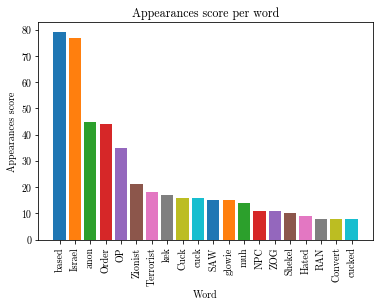

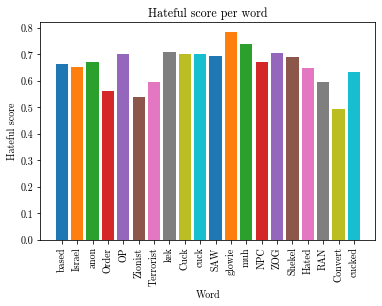

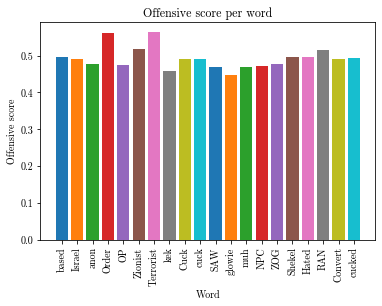

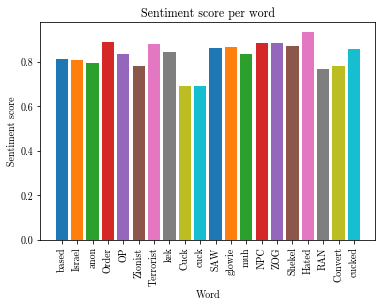

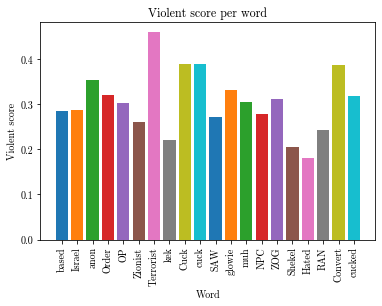

In [7]:
#make bar graphs of most frequent words for each of the wanted columns
for wanted_column in wanted_columns:
    plt.figure()
    title = wanted_column.title()
    for i, word in enumerate(words):
        plt.bar(word, df.loc[i, wanted_column].item())
    plt.xlabel('Word')
    plt.ylabel(f'{title} score')
    plt.title(f'{title} score per word') 
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(len(words))))
    ax.set_xticklabels(labels=words,rotation=90)
    plt.show()

In [8]:
#load raw (full response) data
df = pd.read_csv('cleaned_data.csv')
df['date'] = pd.to_datetime(df['date'])

#appearances isn't a 0-1 score like the others, so get rid of it for this part
score_columns = [item for item in wanted_columns if item != 'appearances'] 

In [9]:
#get list of times
time = list(df['date'])
time.reverse()

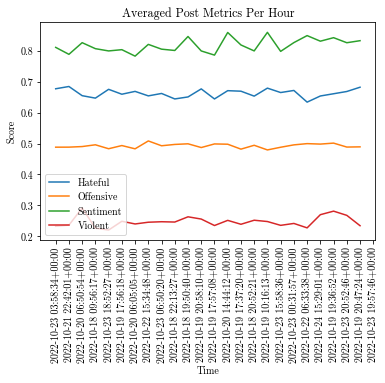

In [10]:
#make score visualizations over time
plt.figure()
for wanted_column in score_columns:
    temp_df = df.groupby(df['date'].dt.hour).mean()
    plt.plot(temp_df[wanted_column], label=wanted_column.title())
    plt.ylabel('Score')
    plt.xlabel('Time')
    plt.title('Averaged Post Metrics Per Hour')
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(len(time[::100]))))
ax.set_xticklabels(labels=time[::100], rotation=90)
plt.legend()
plt.show()

In [17]:
def class_pie():
    fig = plt.figure()
    ax = plt.gca()
    df = pd.read_csv('antisemitism_dataset.csv')
    binary_numbers = [len(df[df['classification'] == x]) for x in range(2)]
    plt.pie(x=binary_numbers, labels=[f'Not antisemitic ({binary_numbers[0]})', f'Antisemitic ({binary_numbers[1]})'],
           labeldistance=None, colors=['tab:blue', 'tab:orange'])
    plt.legend()
    fig.savefig('binary_pie.pdf', bbox_inches='tight', pad_inches = 0)
    
    fig = plt.figure()
    ax = plt.gca()
    type_numbers = [len(df[df['type_of_antisemitism'] == x]) for x in range(4)]
    MULTI_LABELS = ['Political', 'Economic', 'Religious', 'Racial']
    labels = [f'{label} ({type_numbers[i]})' for i, label in enumerate(MULTI_LABELS)]
    plt.pie(x=type_numbers, labels=labels, labeldistance=None, colors=['tab:olive', 'tab:pink', 'tab:green', 'tab:red'])
    plt.legend()
    plt.savefig('type_pie.pdf', bbox_inches='tight', pad_inches = 0)
    
    df = df.fillna(0)
    status_ind, type_ind = list(df.columns.values).index('classification'), list(df.columns.values).index('type_of_antisemitism')
    df['5type'] = df.apply(lambda x: x[status_ind] + x[type_ind] if x[status_ind] else x[status_ind], axis=1)
    fig = plt.figure()
    ax = plt.gca()
    type5_numbers = [len(df[df['5type'] == x]) for x in range(5)]
    FIVE_LABELS = ['Not antisemitic', 'Politically antisemitic', 
                   'Economically antisemitic', 'Religiously antisemitic', 'Racially antisemitic']
    labels = [f'{label} ({type5_numbers[i]})' for i, label in enumerate(FIVE_LABELS)]
    plt.pie(x=type5_numbers, labels=labels, labeldistance=None, colors=['tab:blue', 'tab:olive', 'tab:pink', 'tab:green', 'tab:red'])
    plt.legend()
    plt.savefig('type5_pie.pdf', bbox_inches='tight', pad_inches = 0)

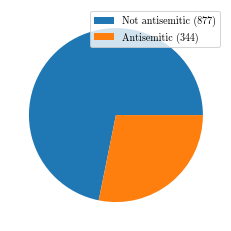

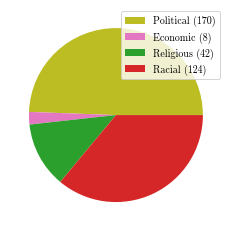

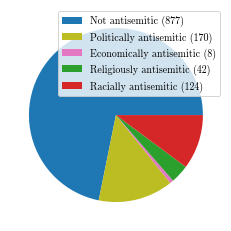

In [18]:
class_pie()